In [1]:
from util import *


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
Connected DB CINS_SMY - conn
Connected oraDW_ANALYTICS - conn_aly


In [2]:
query = """WITH 
T1 AS (
    SELECT * FROM CINS_REACTIVATED_CASA_ALY_CUSTOMER_CDE_01072023),
T2 AS (
    SELECT * FROM CINS_FEATURE_STORE_REACTIVATED_01072023
    WHERE FTR_NM IN ('CASA_BAL_SUM_NOW', 'CASA_TXN_AMT_AVG_36M', 'CASA_TXN_AMT_SUM_36M', 'CASA_TXN_CT_12M', 'CASA_DAY_SINCE_LAST_TXN_CT_36M'))
    
SELECT T2.CUSTOMER_CDE, T2.FTR_NM, T2.FTR_VAL
FROM T2 INNER JOIN T1
ON T1.CUSTOMER_CDE = T2.CUSTOMER_CDE"""

In [3]:
aly = download_or_reload('data/ALY_REACT_07', query)

Len 180371


In [4]:
aly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180371 entries, 0 to 180370
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   CUSTOMER_CDE  180371 non-null  object
 1   FTR_NM        180371 non-null  object
 2   FTR_VAL       180371 non-null  object
dtypes: object(3)
memory usage: 4.1+ MB


In [5]:
aly

,CUSTOMER_CDE,FTR_NM,FTR_VAL
0,9319250,CASA_BAL_SUM_NOW,1568
1,9319309,CASA_BAL_SUM_NOW,5949
2,9257896,CASA_BAL_SUM_NOW,1786
3,9481630,CASA_BAL_SUM_NOW,602
4,9491948,CASA_BAL_SUM_NOW,500
...,...,...,...
180366,5381177,CASA_TXN_AMT_SUM_36M,5000
180367,17551444,CASA_TXN_AMT_SUM_36M,1428
180368,17489424,CASA_TXN_AMT_SUM_36M,10300
180369,6628367,CASA_TXN_AMT_SUM_36M,1091


In [6]:
aly = aly.pivot(index='CUSTOMER_CDE', columns='FTR_NM', values='FTR_VAL')
aly

FTR_NM,CASA_BAL_SUM_NOW,CASA_DAY_SINCE_LAST_TXN_CT_36M,CASA_TXN_AMT_SUM_36M,CASA_TXN_CT_12M
CUSTOMER_CDE,,,,
10001837,98,9,21,1
10004207,10000,11,10000,1
10005763,2467,10,1000,1
10005934,2367,17,1200,1
10006383,1250,15,1100,1
...,...,...,...,...
9996132,NaN,1095,NaN,NaN
9996358,2000,8,2000,1
9996821,400,4,200050000,2


In [7]:
for c in aly.columns:
    aly[c] = pd.to_numeric(aly[c],errors='coerce')

In [8]:
aly.dtypes

FTR_NM
CASA_BAL_SUM_NOW                  float64
CASA_DAY_SINCE_LAST_TXN_CT_36M      int64
CASA_TXN_AMT_SUM_36M              float64
CASA_TXN_CT_12M                   float64
dtype: object

In [9]:
aly.describe()

FTR_NM,CASA_BAL_SUM_NOW,CASA_DAY_SINCE_LAST_TXN_CT_36M,CASA_TXN_AMT_SUM_36M,CASA_TXN_CT_12M
count,4.356400e+04,46527.000000,4.517700e+04,45103.000000
mean,1.022610e+06,36.044533,2.538708e+07,3.359954
std,5.387398e+07,177.739434,5.891305e+08,14.649550
min,0.000000e+00,1.000000,1.000000e+00,1.000000
25%,2.000000e+03,1.000000,2.936000e+03,1.000000
50%,1.000000e+04,2.000000,1.030000e+04,1.000000
75%,2.000100e+04,10.000000,1.450000e+06,2.000000
max,1.074146e+10,1095.000000,7.080176e+10,1452.000000


<Axes: xlabel='CASA_TXN_AMT_SUM_36M', ylabel='Density'>

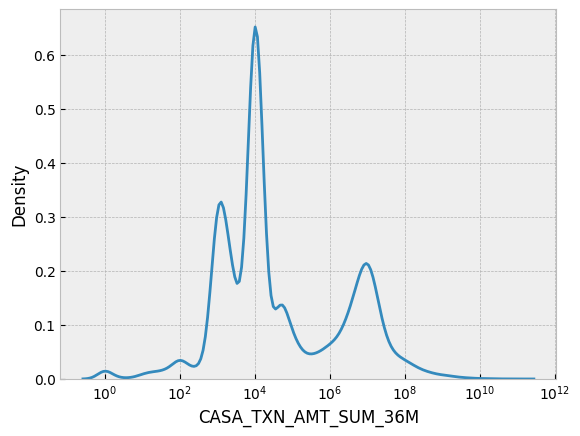

In [10]:
sns.kdeplot(aly['CASA_TXN_AMT_SUM_36M'], log_scale=True)


<Axes: xlabel='CASA_TXN_AMT_SUM_36M', ylabel='Count'>

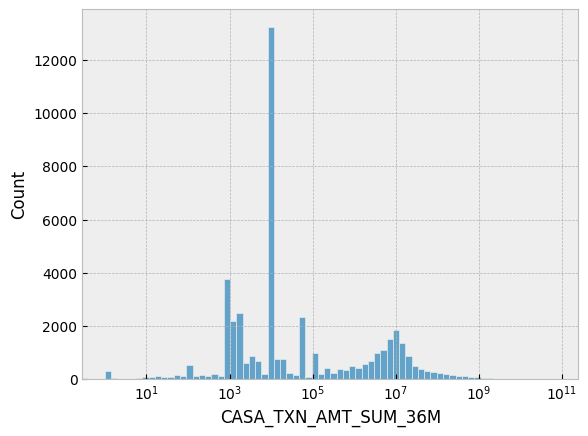

In [11]:
sns.histplot(aly['CASA_TXN_AMT_SUM_36M'], log_scale=True)

In [12]:
aly[aly['CASA_TXN_AMT_SUM_36M'].notnull()]

FTR_NM,CASA_BAL_SUM_NOW,CASA_DAY_SINCE_LAST_TXN_CT_36M,CASA_TXN_AMT_SUM_36M,CASA_TXN_CT_12M
CUSTOMER_CDE,,,,
10001837,98.0,9,21.0,1.0
10004207,10000.0,11,10000.0,1.0
10005763,2467.0,10,1000.0,1.0
10005934,2367.0,17,1200.0,1.0
10006383,1250.0,15,1100.0,1.0
...,...,...,...,...
9996090,379.0,1,3140370.0,3.0
9996358,2000.0,8,2000.0,1.0
9996821,400.0,4,200050000.0,2.0


In [19]:
aly[aly['CASA_TXN_AMT_SUM_36M']<=50000]

FTR_NM,CASA_BAL_SUM_NOW,CASA_DAY_SINCE_LAST_TXN_CT_36M,CASA_TXN_AMT_SUM_36M,CASA_TXN_CT_12M
CUSTOMER_CDE,,,,
10001837,98.0,9,21.0,1.0
10004207,10000.0,11,10000.0,1.0
10005763,2467.0,10,1000.0,1.0
10005934,2367.0,17,1200.0,1.0
10006383,1250.0,15,1100.0,1.0
...,...,...,...,...
9995131,1300.0,1,50.0,1.0
9995480,2000.0,8,2000.0,1.0
9996358,2000.0,8,2000.0,1.0


In [13]:
aly[aly['CASA_TXN_CT_12M'].notnull()]

FTR_NM,CASA_BAL_SUM_NOW,CASA_DAY_SINCE_LAST_TXN_CT_36M,CASA_TXN_AMT_SUM_36M,CASA_TXN_CT_12M
CUSTOMER_CDE,,,,
10001837,98.0,9,21.0,1.0
10004207,10000.0,11,10000.0,1.0
10005763,2467.0,10,1000.0,1.0
10005934,2367.0,17,1200.0,1.0
10006383,1250.0,15,1100.0,1.0
...,...,...,...,...
9996090,379.0,1,3140370.0,3.0
9996358,2000.0,8,2000.0,1.0
9996821,400.0,4,200050000.0,2.0


<Axes: xlabel='CASA_TXN_CT_12M', ylabel='Count'>

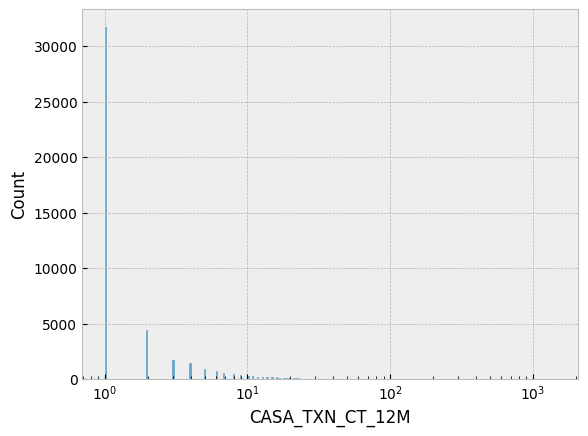

In [14]:
sns.histplot(aly['CASA_TXN_CT_12M'], log_scale=True)

<Axes: xlabel='CASA_TXN_CT_12M', ylabel='CASA_TXN_AMT_SUM_36M'>

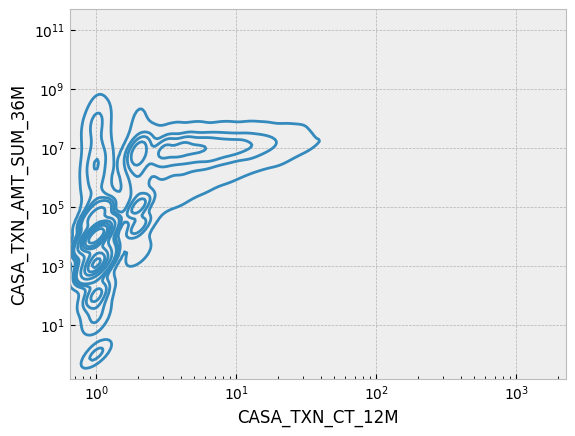

In [15]:
sns.kdeplot(aly, x='CASA_TXN_CT_12M', y='CASA_TXN_AMT_SUM_36M', log_scale=True)

In [16]:
aly['CASA_DAY_SINCE_LAST_TXN_CT_36M'].value_counts()

1      18427
2       5294
3       2542
5       2324
8       2271
       ...  
489        1
632        1
614        1
620        1
753        1
Name: CASA_DAY_SINCE_LAST_TXN_CT_36M, Length: 77, dtype: int64

<Axes: xlabel='CASA_DAY_SINCE_LAST_TXN_CT_36M', ylabel='Count'>

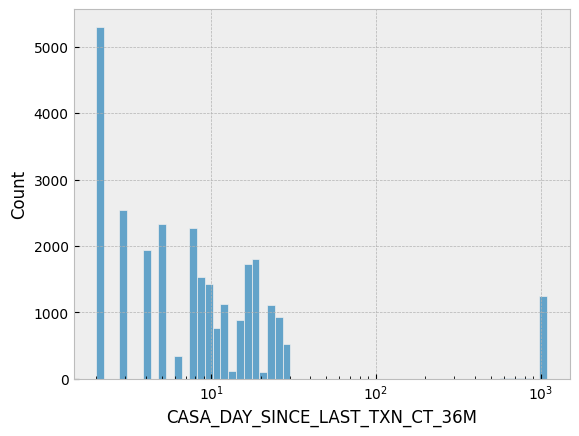

In [17]:
sns.histplot(aly[aly['CASA_DAY_SINCE_LAST_TXN_CT_36M']>1], x='CASA_DAY_SINCE_LAST_TXN_CT_36M', log_scale=True)